# Collaborative filtering

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.sparse as scsp

### Analyzing the given ratings dataset
Show graphs in which the characteristics of the ratings are shown:
1. Distribution of how often a movie is rated
2. Distribution of how often a specific rating was given
3. Distribution of the average ratings given to a movie
4. Distribution of the average ratings given by the users
5. Something you want to learn from the data set

The following files are going to be used for plotting these graphs:
- movies.csv
  - movieId, title, genres
- ratings.csv
  - userId, movieId, rating, timestamp

In [2]:
movies = pd.read_csv('./dataset/movies.csv')
ratings = pd.read_csv('./dataset/ratings.csv')

In [3]:
movies.head(3)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


In [4]:
ratings.head(3)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182


#### 1. Distribution of how often a movie is rated

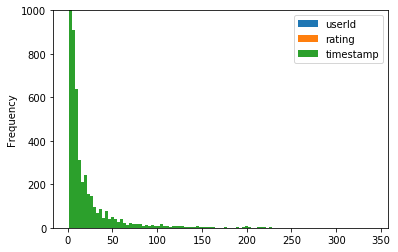

In [5]:
rate_count = ratings.groupby('movieId').count()

rate_count.plot.hist(bins=100, ylim=(0, 1000))

#### 2. Distribution of how often a specific rating was given

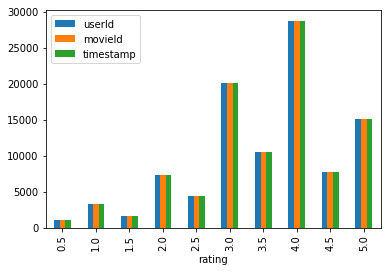

In [6]:
specific_rate_count = ratings.groupby('rating').count()

specific_rate_count.plot(kind='bar')

#### 3. Distribution of the average ratings given to a movie

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10ed53490>]],
      dtype=object)

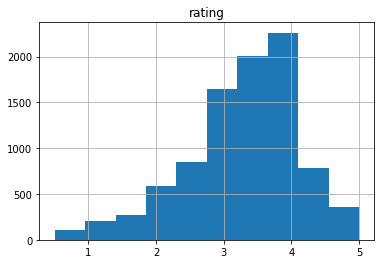

In [7]:
avg_movie_ratings = ratings.groupby('movieId').mean()

avg_movie_ratings.hist(column='rating', bins=10)

#### 4. Distribution of the average ratings given by the users

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1103dd050>]],
      dtype=object)

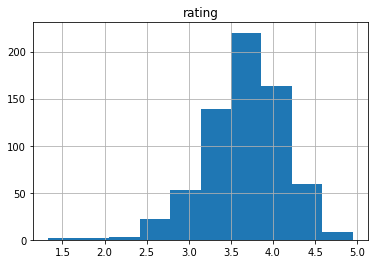

In [8]:
avg_user_ratings = ratings.groupby('userId').mean()

avg_user_ratings.hist(column='rating', bins=10)

#### 5. Something you want to learn from the data set

In [9]:
# helemaal niks geak

### User-item matrix

In [10]:
#  [] movieId --->
#  U  
#  S    Ratings ->
#  E     |
#  R    \/
#  |
# \/

row  = ratings['userId']
col  = ratings['movieId']
data = ratings['rating']

user_item_matrix = scsp.coo_matrix((data, (row, col)))

### User-user recommendation
Derive user-user similarity matrices based on:
1. Cosine similarity
2. Pearson similarity
3. Adjusted cosine similarity

and give N (configurable) recommendations for a given user U (configurable) derived from the ratings of the 10 most similar users for each of these similarities.

In [11]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import normalize

#### 1. Cosine similarity
Index `0` is always zero because there is no user with userId = `0`

In [12]:
cos_user_matrix = cosine_similarity(user_item_matrix)
pd.DataFrame(cos_user_matrix).head(10)

,0,1,2,3,4,5,6,7,8,9,...,662,663,664,665,666,667,668,669,670,671
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,1.000000,0.000000,0.000000,0.074482,0.016818,0.000000,0.083884,0.000000,0.012843,...,0.000000,0.000000,0.014474,0.043719,0.000000,0.000000,0.000000,0.062917,0.000000,0.017466
2,0.0,0.000000,1.000000,0.124295,0.118821,0.103646,0.000000,0.212985,0.113190,0.113333,...,0.477306,0.063202,0.077745,0.164162,0.466281,0.425462,0.084646,0.024140,0.170595,0.113175
3,0.0,0.000000,0.124295,1.000000,0.081640,0.151531,0.060691,0.154714,0.249781,0.134475,...,0.161205,0.064198,0.176134,0.158357,0.177098,0.124562,0.124911,0.080984,0.136606,0.170193
4,0.0,0.074482,0.118821,0.081640,1.000000,0.130649,0.079648,0.319745,0.191013,0.030417,...,0.114319,0.047228,0.136579,0.254030,0.121905,0.088735,0.068483,0.104309,0.054512,0.211609
5,0.0,0.016818,0.103646,0.151531,0.130649,1.000000,0.063796,0.095888,0.165712,0.086616,...,0.191029,0.021142,0.146173,0.224245,0.139721,0.058252,0.042926,0.038358,0.062642,0.225086
6,0.0,0.000000,0.000000,0.060691,0.079648,0.063796,1.000000,0.000000,0.128502,0.021745,...,0.012962,0.009033,0.124477,0.082602,0.000000,0.000000,0.019563,0.024583,0.019465,0.087705
7,0.0,0.083884,0.212985,0.154714,0.319745,0.095888,0.000000,1.000000,0.149572,0.059728,...,0.205832,0.077539,0.134793,0.147643,0.168489,0.232051,0.058773,0.073151,0.096240,0.268672
8,0.0,0.000000,0.113190,0.249781,0.191013,0.165712,0.128502,0.149572,1.000000,0.157356,...,0.108371,0.085964,0.274382,0.231523,0.122108,0.069005,0.112366,0.055143,0.247687,0.406414
9,0.0,0.012843,0.113333,0.134475,0.030417,0.086616,0.021745,0.059728,0.157356,1.000000,...,0.078187,0.104944,0.077545,0.155774,0.060690,0.066412,0.194493,0.029291,0.384429,0.168497


#### 2. Pearson similarity
Index `0` is always zero because there is no user with userId = `0`

In [14]:
# for every row calculate avg rating per user
user_ratings = ratings.groupby('userId').mean()

# for every value in row substract with avg user rating (except zeros)


# Note: 0 is now the average


# cosine similarity
# pearson_user_matrix = cosine_similarity(norm_user_item_matrix)
# pd.DataFrame(pearson_user_matrix).head(10)

,movieId,rating,timestamp
userId,,,
1,1675.600000,2.550000,1.260759e+09
2,354.828947,3.486842,8.353557e+08
3,8207.901961,3.568627,1.298890e+09
4,1721.514706,4.348039,9.498806e+08
5,6655.940000,3.910000,1.163374e+09
6,3088.500000,3.261364,1.108620e+09
7,775.056818,3.465909,8.518680e+08
8,6383.620690,3.866379,1.154438e+09
9,1562.666667,3.755556,9.386399e+08


#### 3. Adjusted cosine similarity
Index `0` is always zero because there is no user with userId = `0`